# Import de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Carregando e visualizando os dados

In [2]:
Data = pd.read_csv("https://raw.githubusercontent.com/gsmteixeira/EAFExp2023/main/data/Pima-Diabetes.csv",
                   names=['No gravidez',
                          'Glicose (mg/dL)',
                          'Pressão Sanguínea (mmHg)',
                          'Espessura da pele (micro m)',
                          'Insulina',
                          'BMI',
                          'DPF',
                          'Idade',
                          'Resultado'])

Data

,No gravidez,Glicose (mg/dL),Pressão Sanguínea (mmHg),Espessura da pele (micro m),Insulina,BMI,DPF,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1
755,1,128,88,39,110,36.5,1.057,37,1
756,7,137,90,41,0,32.0,0.391,39,0


# Separando treino teste e validação

In [3]:
# inicializa um array de indices, correspondente ao indices dos dados aleatorizados 
all_index = range(len(Data))
random_index = np.random.choice(all_index, len(all_index), replace=False)

# escolhendo ~80% dos dados para treino e ~20% pra teste
train_len = int(0.8*len(Data))

train_index = random_index[:train_len]
test_index = random_index[train_len:]


# dos 80% dos dados de treino, 1/8 (10% do total) será usado para validação durante o treinamento
val_size = int(1/8*len(train_index))

val_index = train_index[:val_size]
train_index = train_index[val_size:]

# atribuindo os indices correspondentes a cada conjunto
data_train = Data.iloc[train_index]
data_test = Data.iloc[test_index]
data_val = Data.iloc[val_index]

print(f"Data size => {len(Data)}")
print(f"Train size => {len(data_train)}")
print(f"Test size => {len(data_test)}")
print(f"Val size => {len(data_val)}")


Data size => 758
Train size => 531
Test size => 152
Val size => 75


In [5]:
data_train

,No gravidez,Glicose (mg/dL),Pressão Sanguínea (mmHg),Espessura da pele (micro m),Insulina,BMI,DPF,Idade,Resultado
45,0,180,66,39,0,42.0,1.893,25,1
373,2,105,58,40,94,34.9,0.225,25,0
554,1,84,64,23,115,36.9,0.471,28,0
331,2,87,58,16,52,32.7,0.166,25,0
389,3,100,68,23,81,31.6,0.949,28,0
...,...,...,...,...,...,...,...,...,...
707,2,127,46,21,335,34.4,0.176,22,0
18,1,103,30,38,83,43.3,0.183,33,0
12,10,139,80,0,0,27.1,1.441,57,0
266,0,138,0,0,0,36.3,0.933,25,1


In [4]:
# separando dados observados e o gabarito (sendo o gabarito a ultma tabela, "Resultados")

x_train = np.array(data_train)[:, :-1]
x_test = np.array(data_test)[:, :-1]
x_val = np.array(data_val)[:, :-1]

y_train = np.array(data_train)[:, -1]
y_test = np.array(data_test)[:, -1]
y_val = np.array(data_val)[:, -1]


In [6]:
x_train

array([[0.000e+00, 1.800e+02, 6.600e+01, ..., 4.200e+01, 1.893e+00,
        2.500e+01],
       [2.000e+00, 1.050e+02, 5.800e+01, ..., 3.490e+01, 2.250e-01,
        2.500e+01],
       [1.000e+00, 8.400e+01, 6.400e+01, ..., 3.690e+01, 4.710e-01,
        2.800e+01],
       ...,
       [1.000e+01, 1.390e+02, 8.000e+01, ..., 2.710e+01, 1.441e+00,
        5.700e+01],
       [0.000e+00, 1.380e+02, 0.000e+00, ..., 3.630e+01, 9.330e-01,
        2.500e+01],
       [2.000e+00, 1.140e+02, 6.800e+01, ..., 2.870e+01, 9.200e-02,
        2.500e+01]])

# Normalização

In [37]:
#normalização dividindo cada coluna pelo valor máximo daquela feature no conjunto de treino

norm = np.max(x_train, axis=0)
# (x_train/norm).shape

norm_x_train = x_train/norm
norm_x_test = x_test/norm
norm_x_val = x_val/norm 

norm_std_x_train = (x_train-np.mean(x_train,axis=0))/np.std(x_train, axis=0)
norm_std_x_test= (x_test-np.mean(x_train,axis=0))/np.std(x_train, axis=0)
norm_std_x_tval = (x_val-np.mean(x_train,axis=0))/np.std(x_train, axis=0)

#norm_x_train = norm_std_x_train
#norm_x_test = norm_std_x_test
#norm_x_val = norm_std_x_tval

In [20]:
norm

array([ 17.  , 198.  , 114.  ,  63.  , 846.  ,  59.4 ,   2.42,  72.  ])

# Inicializando modelo

In [41]:
import tensorflow.keras as tfk

network = tfk.models.Sequential()

network.add(tfk.layers.Dense(128, activation = 'linear', input_shape = x_train.shape[1:]))
network.add(tfk.layers.Dropout(0.7))

network.add(tfk.layers.Dense(64, activation = 'linear'))
network.add(tfk.layers.Dropout(0.6))

network.add(tfk.layers.Dense(32, activation = 'tanh'))
network.add(tfk.layers.Dropout(0.6))

network.add(tfk.layers.Dense(1, activation = 'sigmoid'))
network.compile(optimizer = 'Nadam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

# model = tfk.models.Model(network)

# Treinamento 

In [42]:
EPOCHS = 60
BATCH_SIZE = 32

history = network.fit(x=norm_x_train, y=y_train,
                        validation_data=(norm_x_val, y_val),
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE)

Epoch 1/60
17/17 [==============================] - 1s 12ms/step - loss: 0.7331 - accuracy: 0.5763 - val_loss: 0.6287 - val_accuracy: 0.7200
Epoch 2/60
17/17 [==============================] - 0s 3ms/step - loss: 0.7301 - accuracy: 0.5593 - val_loss: 0.6041 - val_accuracy: 0.7200
Epoch 3/60
17/17 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.6290 - val_loss: 0.6047 - val_accuracy: 0.7333
Epoch 4/60
17/17 [==============================] - 0s 3ms/step - loss: 0.7037 - accuracy: 0.5838 - val_loss: 0.6026 - val_accuracy: 0.7333
Epoch 5/60
17/17 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.6252 - val_loss: 0.5980 - val_accuracy: 0.7333
Epoch 6/60
17/17 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.6139 - val_loss: 0.5931 - val_accuracy: 0.7333
Epoch 7/60
17/17 [==============================] - 0s 4ms/step - loss: 0.6652 - accuracy: 0.6215 - val_loss: 0.5918 - val_accuracy: 0.7200
Epoch 8/60
17/17 [=

# Resultados

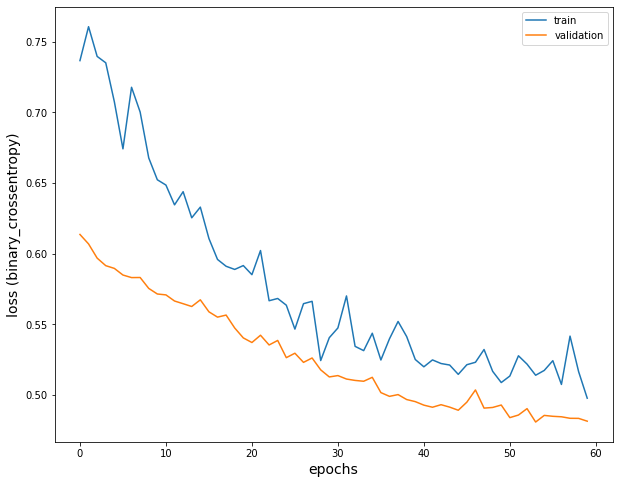

In [13]:
# curva de treino
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss (binary_crossentropy)', fontsize=14)
plt.legend()

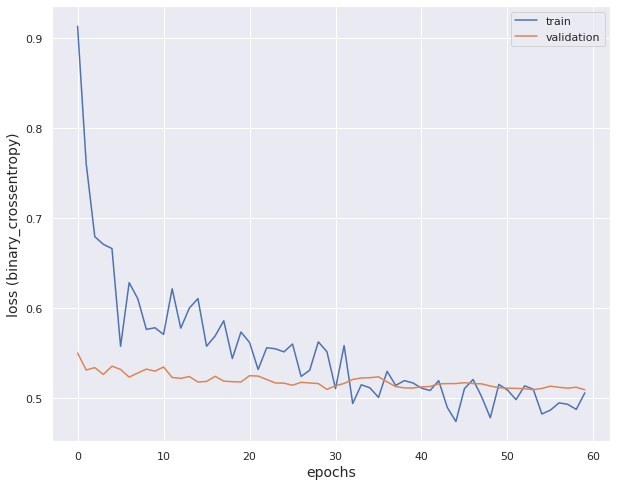

In [34]:
# curva de treino
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss (binary_crossentropy)', fontsize=14)
plt.legend()

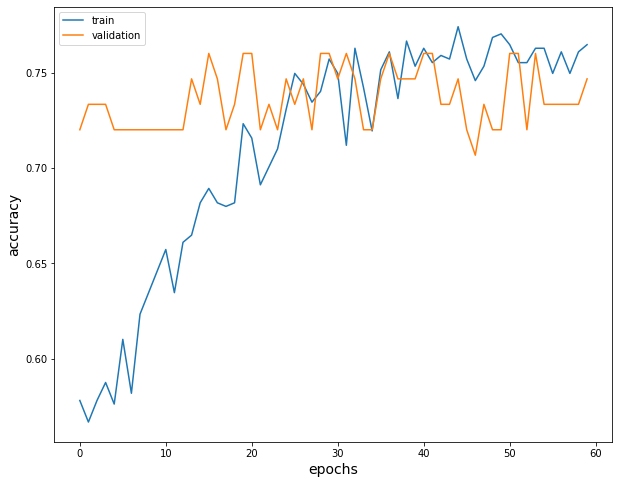

In [14]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')

plt.xlabel('epochs', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.legend()

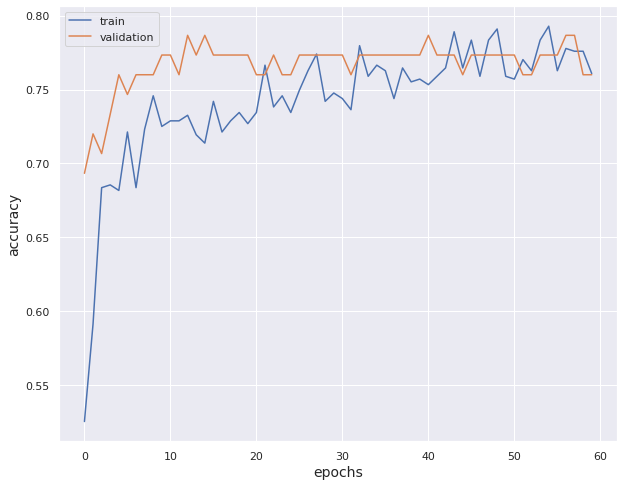

In [35]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')

plt.xlabel('epochs', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.legend()

# Teste 

5/5 [==============================] - 0s 2ms/step


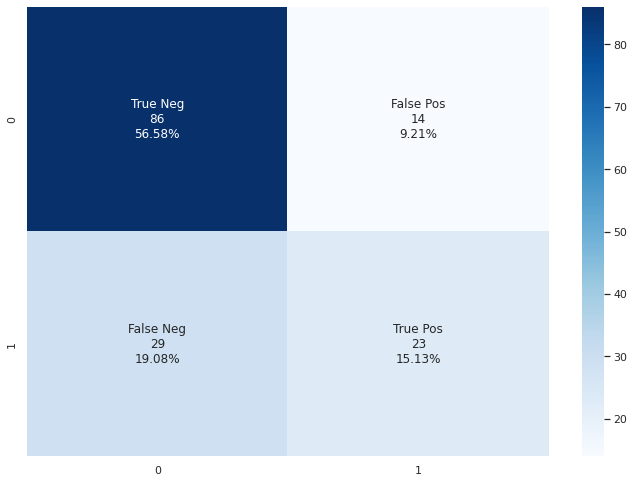

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = (network.predict(norm_x_test) > .5).astype('int')

cf_matrix = confusion_matrix(y_test, y_pred)

sns.set(rc={'figure.figsize':(11.7,8.27)})

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

5/5 [==============================] - 0s 2ms/step


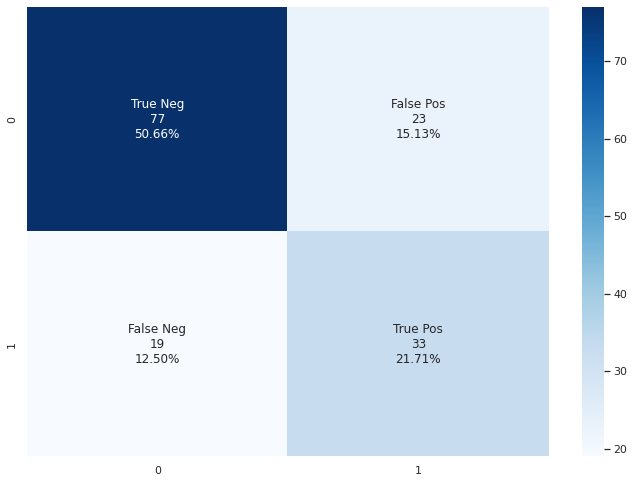

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = (network.predict(norm_x_test) > .5).astype('int')

cf_matrix = confusion_matrix(y_test, y_pred)

sns.set(rc={'figure.figsize':(11.7,8.27)})

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Teste uma nova forma de normalização dos dados e compare os resultados

Sugestão: Standard Deviation Normalization

$$
x_{norm} = \frac{x - \bar{x}}{\sigma}
$$

In [25]:
norm_std_x_train = (x_train-np.mean(x_train,axis=0))/np.std(x_train, axis=0)
norm_std_x_test= (x_test-np.mean(x_train,axis=0))/np.std(x_train, axis=0)
norm_std_x_tval = (x_val-np.mean(x_train,axis=0))/np.std(x_train, axis=0)

In [24]:
norm_std

array([[-1.15390402,  1.77608231, -0.19405683, ...,  1.29388695,
         4.23181568, -0.71005043],
       [-0.56361208, -0.52483431, -0.62497863, ...,  0.35736091,
        -0.73708094, -0.71005043],
       [-0.85875805, -1.16909097, -0.30178728, ...,  0.62117106,
        -0.00425805, -0.44583405],
       ...,
       [ 1.79755568,  0.51824789,  0.56005632, ..., -0.67149868,
         2.88532811,  2.10825766],
       [-1.15390402,  0.487569  , -3.74916168, ...,  0.54202801,
         1.37201907, -0.71005043],
       [-0.56361208, -0.24872432, -0.08632638, ..., -0.46045056,
        -1.13328193, -0.71005043]])